# Opdrachten statistiek in Python

In [216]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from scipy import stats
import plotly.plotly as py
import pylab
import savReaderWriter 
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

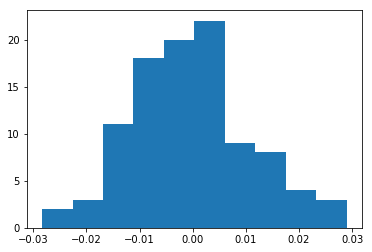

In [204]:
mu, sigma = 0, 0.01

leeftijd = np.random.uniform(20,40,100)
lengte = np.random.normal(mu,sigma,100)

np.histogram(lengte)
plt.hist(lengte)
plt.show()

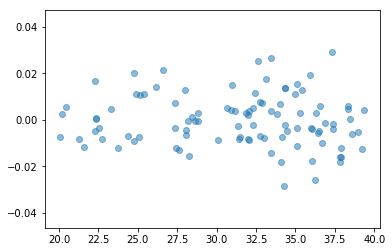

In [217]:
# show scatterplot 
plt.scatter(leeftijd, lengte, alpha=0.5)
plt.show()

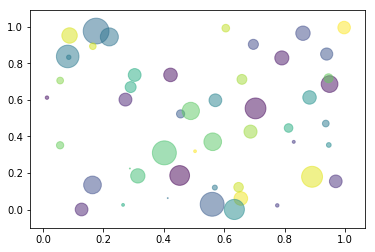

In [61]:
# Voorbeeld van een scatterplot
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

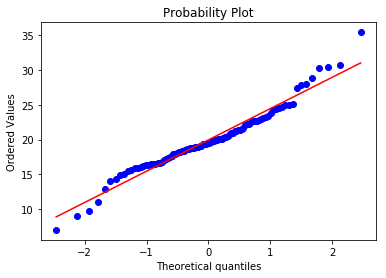

In [113]:
# voorbeeld probability plot 
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

# Vraag 4 

In [215]:
# read in .sav file 
with savReaderWriter.SavReader('C:/Users/Tamara/Desktop/lowbwt.sav') as reader:
    records = reader.all()

#print(records)
# records to data.frame 
df = pd.DataFrame(records)

# namen voor kolommen 
my_columns= ["a","b","c","d","e","f","g","h","i", "j", "k", "l"]
df.columns = my_columns

# selecteer de bovenste 10 records
df.head(10)


,a,b,c,d,e,f,g,h,i,j,k,l
0,4.0,1.0,28.0,120.0,3.0,1.0,1.0,0.0,1.0,0.0,709.0,54.480
1,10.0,1.0,29.0,130.0,1.0,0.0,0.0,0.0,1.0,2.0,1021.0,59.020
2,11.0,1.0,34.0,187.0,2.0,1.0,0.0,1.0,0.0,0.0,1135.0,84.898
3,13.0,1.0,25.0,105.0,3.0,0.0,1.0,1.0,0.0,0.0,1330.0,47.670
4,15.0,1.0,25.0,85.0,3.0,0.0,0.0,0.0,1.0,0.0,1474.0,38.590
5,16.0,1.0,27.0,150.0,3.0,0.0,0.0,0.0,0.0,0.0,1588.0,68.100
6,17.0,1.0,23.0,97.0,3.0,0.0,0.0,0.0,1.0,1.0,1588.0,44.038
7,18.0,1.0,24.0,128.0,2.0,0.0,1.0,0.0,0.0,1.0,1701.0,58.112
8,19.0,1.0,24.0,132.0,3.0,0.0,0.0,1.0,0.0,0.0,1729.0,59.928
9,20.0,1.0,21.0,165.0,1.0,1.0,0.0,1.0,0.0,1.0,1790.0,74.910


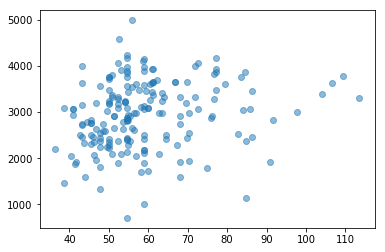

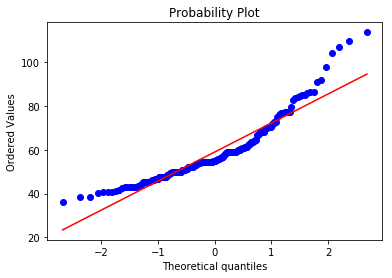

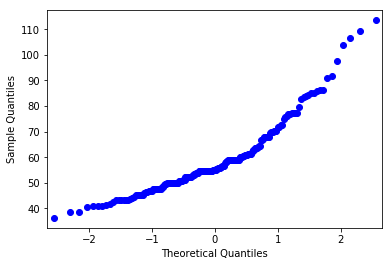

In [219]:
# k (bwt) en l (gewicht) 
plt.scatter(df.l,df.k, alpha=0.5)
plt.show()

# qq plot met probplot
stats.probplot(df.l, dist="norm", plot=pylab)
pylab.show()

# qq plot met qqplot 
sm.qqplot(df.l)
plt.show()

In [201]:
# linear model 
# this is the standard import if you're using "formula notation" (similar to R)
lm = smf.ols(formula='df.k ~ df.l', data=df).fit()

# print the coefficients
lm.params

Intercept    2369.672063
df.l            9.756087
dtype: float64

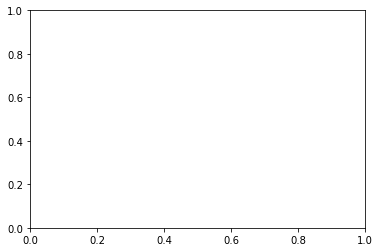

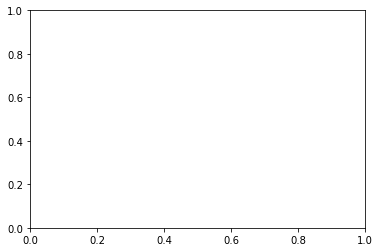

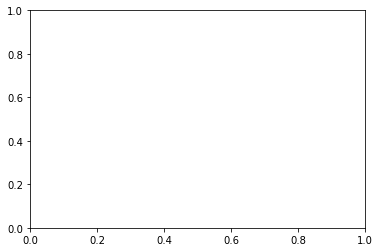

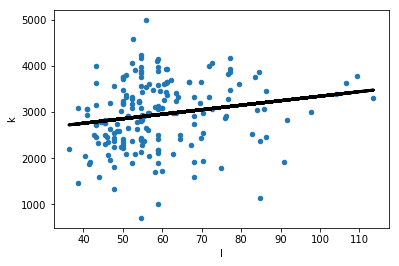

In [191]:
# Linear regression model 
# Reshape dataframe values for sklearn
fit_data = df[['l', 'k']].values
x_data = fit_data[:,0].reshape(-1,1)
y_data = fit_data[:,1].reshape(-1,1)
 
# Create linear regression object
regr = linear_model.LinearRegression()
# once the data is reshaped, running the fit is simple
regr.fit(x_data, y_data)
 
# we can then plot the data and out fit
axes = df.plot(x="l", y="k", kind="scatter")
plt.plot(x_data, regr.predict(x_data), color='black', linewidth=3)
plt.show()

In [203]:
# OLS Regression Results 
mod = smf.ols(formula='df.k ~ df.l', data=df)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                   df.k   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.686
Date:                Thu, 02 Mar 2017   Prob (F-statistic):             0.0105
Time:                        13:23:22   Log-Likelihood:                -1510.2
No. Observations:                 189   AIC:                             3024.
Df Residuals:                     187   BIC:                             3031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2369.6721    228.431     10.374      0.0

# Opdracht 5 

In [210]:
# f (smoke) en k (bwt)
mod2 = smf.ols(formula='df.k ~ df.f', data=df)
res2 = mod2.fit()
print res2.summary()

                            OLS Regression Results                            
Dep. Variable:                   df.k   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.936
Date:                Thu, 02 Mar 2017   Prob (F-statistic):            0.00916
Time:                        13:33:44   Log-Likelihood:                -1510.1
No. Observations:                 189   AIC:                             3024.
Df Residuals:                     187   BIC:                             3031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3054.9565     66.933     45.642      0.0

# Opdracht 6

In [211]:
mod3 = smf.ols(formula='df.k ~ df.l + df.f', data=df)
res3 = mod3.fit()
print res3.summary()

                            OLS Regression Results                            
Dep. Variable:                   df.k   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     6.711
Date:                Thu, 02 Mar 2017   Prob (F-statistic):            0.00153
Time:                        13:34:57   Log-Likelihood:                -1506.9
No. Observations:                 189   AIC:                             3020.
Df Residuals:                     186   BIC:                             3030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2500.1744    230.833     10.831      0.0

#  Opdracht 7 

In [213]:
interactie = df.l*df.k
mod4 = smf.ols(formula='df.k ~ df.l*df.f', data=df)
res4 = mod4.fit()
print res4.summary()

                            OLS Regression Results                            
Dep. Variable:                   df.k   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.638
Date:                Thu, 02 Mar 2017   Prob (F-statistic):            0.00376
Time:                        13:37:39   Log-Likelihood:                -1506.7
No. Observations:                 189   AIC:                             3021.
Df Residuals:                     185   BIC:                             3034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2347.5067    312.717      7.507      0.0